In [1]:
setwd('/import/DB/fel/BJTC-204')

In [9]:
expr3 = read.table('./bulk1.rna-tpm.txt',header =T,sep = '\t')

In [32]:
dim(expr3)

[1] 29007    47

In [11]:
model.gene = c('RPE65' ,'DRD3', 'MC3R','RELB',  'PRF1')

In [25]:
groupinfo = read.csv('./bulk1.group.csv')

In [26]:
expr = expr3[model.gene,groupinfo$sample] %>% tibble::rownames_to_column(.,'sample')

In [28]:
write.table(expr,file  = 'bulk.expr.test1.txt',sep = '\t',quote =F,row.names = F)

In [29]:
write.table(groupinfo,file  = 'bulk.expr.test1.group.txt',sep = '\t',quote =F,row.names = F)

In [30]:
library(dplyr)

Saving 6.67 x 6.67 in image


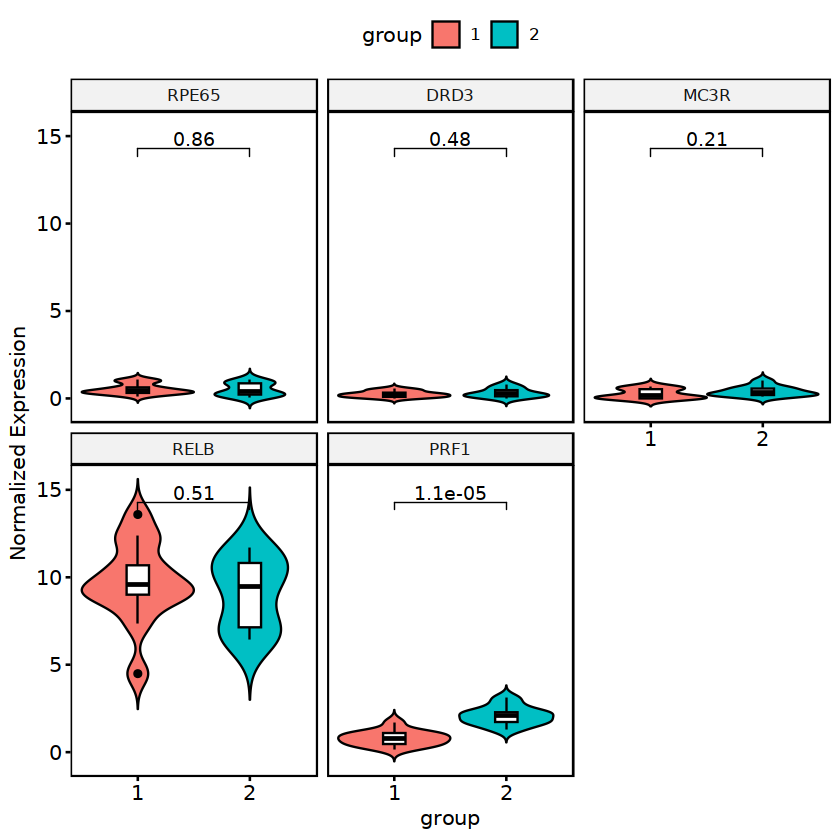

In [31]:
violinplot = function(
    expr = expr,
    gene = gene,
    groupinfo = groupinfo
){

library(dplyr)
library(tidyverse)
library(ggpubr)
count = read.table(expr,header =T,sep = '\t')
groupinfo = read.table(groupinfo,row.names = 1,sep = '\t',header =T)
colnames(count)[1] = 'Gene'
count = count[!duplicated(count$Gene),]

rownames(count) = count[,1]
count = count[,-1]
count  = count[gene,]
count.t = as.data.frame(t(count))
    head(count.t,2)
count.t$group = groupinfo$group
    if (length(unique(count.t$group)) ==3){
    my_comparisons <- list( c(unique(count.t$group)[1], unique(count.t$group)[2]),
                           c(unique(count.t$group)[1], unique(count.t$group)[3]),
                          c(unique(count.t$group)[2], unique(count.t$group)[3]))##分组设定
    e<-count.t %>% 
      dplyr::filter(group %in% unique(count.t$group) ) %>% #筛选行
      ggviolin(x = "group", y = c(colnames(count.t)[1:dim(count.t)[2]-1]), fill = "group",
               combine = T,
             #palette = c("#00AFBB", "#E7B800", "#FC4E07"),##颜色设置
             ylab="Normalized Expression",
             add = "boxplot", add.params = list(fill = "white"))
    p =  e+stat_compare_means(method = "t.test",
                         #label = "p.signif",##星号设置
                         comparisons = my_comparisons)

    print(p)
    }else if(length(unique(count.t$group)) == 2){
    my_comparisons <- list( 
                          c(unique(count.t$group)[1], unique(count.t$group)[2]))##分组设定
    e<-count.t %>% 
      dplyr::filter(group %in% unique(count.t$group) ) %>% #筛选行
      ggviolin(x = "group", y = c(colnames(count.t)[1:dim(count.t)[2]-1]), fill = "group",
               combine = T,
             #palette = c("#00AFBB", "#E7B800", "#FC4E07"),##颜色设置
             ylab="Normalized Expression",
             add = "boxplot", add.params = list(fill = "white"))
    p =  e+stat_compare_means(method = "t.test",
                         #label = "p.signif",##星号设置
                         comparisons = my_comparisons)
    }

if (length(gene) > 6){
    ggsave(file = 'violin.pdf',width = 9,height = 9)
}else{
    ggsave(file = 'violin.pdf')
}
p
#return(count.t)
}

count = './bulk.expr.test1.txt'
gene = c('RPE65' ,'DRD3', 'MC3R','RELB',  'PRF1')
group = './bulk.expr.test1.group.txt'
violinplot(count,gene,group)